<a href="https://colab.research.google.com/github/PedroMarim/toxic-comment-bert/blob/main/notebooks/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/PedroMarim/toxic-comment-bert.git
%cd toxic-comment-bert

Cloning into 'toxic-comment-bert'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
/content/toxic-comment-bert


In [3]:
import os

dirs = [
    "data/raw",
    "data/processed",
    "notebooks",
    "src",
    "demo",
    "models",
    "report",
]

for d in dirs:
    os.makedirs(d, exist_ok=True)

os.listdir()


['models', 'data', 'notebooks', 'src', 'demo', '.git', 'README.md', 'report']

### **Understanding the dataset**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_path = "data/raw/train.csv"
df = pd.read_csv(train_path)

df.head(), df.shape


(                 id                                       comment_text  toxic  \
 0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
 1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
 2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
 3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
 4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   
 
    severe_toxic  obscene  threat  insult  identity_hate  
 0             0        0       0       0              0  
 1             0        0       0       0              0  
 2             0        0       0       0              0  
 3             0        0       0       0              0  
 4             0        0       0       0              0  ,
 (159571, 8))

In [5]:
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

print("Columns:", df.columns.tolist())
print("Number of rows:", len(df))

print("\nLabel prevalence:")
print(df[label_cols].mean().sort_values(ascending=False))


Columns: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
Number of rows: 159571

Label prevalence:
toxic            0.095844
obscene          0.052948
insult           0.049364
severe_toxic     0.009996
identity_hate    0.008805
threat           0.002996
dtype: float64


In [7]:
df["comment_length"] = df["comment_text"].str.len()

df["comment_length"].describe()


,comment_length
count,159571.000000
mean,394.073221
std,590.720282
min,6.000000
25%,96.000000
50%,205.000000
75%,435.000000
max,5000.000000


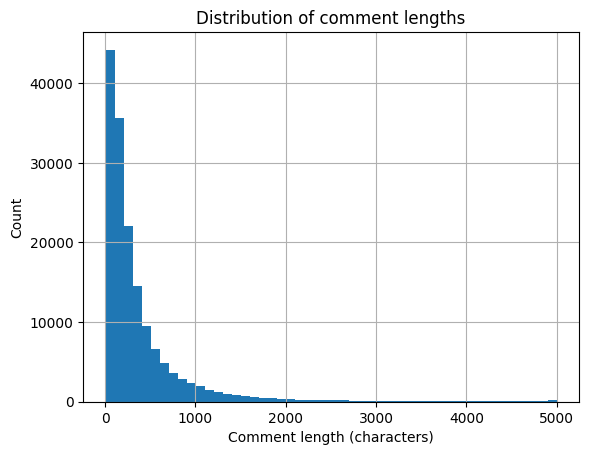

In [8]:
df["comment_length"].hist(bins=50)
plt.xlabel("Comment length (characters)")
plt.ylabel("Count")
plt.title("Distribution of comment lengths")
plt.show()


### **Dataset processing**

In [9]:
from sklearn.model_selection import train_test_split

# helper column: 1 if any label is positive
df["any_toxic"] = (df[label_cols].sum(axis=1) > 0).astype(int)

train_df, temp_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["any_toxic"]
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=42,
    stratify=temp_df["any_toxic"]
)

len(train_df), len(val_df), len(test_df)


(127656, 15957, 15958)

In [10]:
def show_label_stats(name, dframe):
    print(f"\n{name} size: {len(dframe)}")
    print("any_toxic rate:", dframe["any_toxic"].mean())
    print(dframe[label_cols].mean().sort_values(ascending=False))

show_label_stats("Train", train_df)
show_label_stats("Val", val_df)
show_label_stats("Test", test_df)



Train size: 127656
any_toxic rate: 0.10167951369305007
toxic            0.095945
obscene          0.053166
insult           0.049359
severe_toxic     0.010105
identity_hate    0.008977
threat           0.002977
dtype: float64

Val size: 15957
any_toxic rate: 0.10164817948235884
toxic            0.094316
obscene          0.051576
insult           0.048380
identity_hate    0.008836
severe_toxic     0.008648
threat           0.003071
dtype: float64

Test size: 15958
any_toxic rate: 0.10170447424489285
toxic            0.096566
obscene          0.052576
insult           0.050382
severe_toxic     0.010465
identity_hate    0.007394
threat           0.003071
dtype: float64


In [13]:
processed_dir = "data/processed"
train_df.to_csv(f"{processed_dir}/train.csv", index=False)
val_df.to_csv(f"{processed_dir}/val.csv", index=False)
test_df.to_csv(f"{processed_dir}/test.csv", index=False)
